# **E-Commerce Public Data Analysis Project**

- Nama: Abd. Saleh
- Email: 4bd.saleh@gmail.com
- ID Dicoding: abdsaleh

## **Menentukan Pertanyaan Bisnis**

1. Bagaimana demografi pelanggan yang kita miliki?
2. Produk apa yang paling banyak dan paling sedikit terjual?
3. Bagaimana performa penjualan dan revenue perusahaan dalam setiap bulan (2016-09 sampai 2018-08) ?

## **Menyiapkan Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib.request
import seaborn as sns

## **Data Wrangling**

### **Gathering Data**

In [2]:
customers_df = pd.read_csv("data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_category_name_df = pd.read_csv("data/product_category_name_translation.csv")
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_df = pd.read_csv("data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### **Assessing Data**

#### Menilai tabel `customers_df`

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai tabel `geolocation_df`

In [15]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [16]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [17]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [18]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### Menilai tabel `order_items_df`

In [19]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [20]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [21]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [22]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Menilai tabel `order_payments_df`

In [23]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [24]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [25]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [26]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Menilai tabel `order_reviews_df`

In [27]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [28]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [29]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [30]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Menilai tabel `orders_df`

In [31]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [32]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [33]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [34]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai tabel `product_category_name_df`

In [35]:
product_category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [36]:
product_category_name_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [37]:
print("Jumlah duplikasi: ", product_category_name_df.duplicated().sum())

Jumlah duplikasi:  0


In [38]:
product_category_name_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Menilai tabel `products_df`

In [39]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [40]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [41]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [42]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Menilai tabel `sellers_df`

In [43]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [44]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [45]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [46]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### **Cleaning Data**

Berdasarkan proses **Assessing Data**, beberapa hal yang perlu dilakukan proses **Cleaning data** yaitu :

#### **`order_items_df`**

Mengganti tipe data pada kolom `shiping_limit_date` menjadi `datetime`

#### **`order_reviews_df`**

1. Mengganti tipe data pada kolom `review_creation_date` dan `review_answer_timestamp` menjadi `datetime`

2. Karena banyak sekali missing value pada kolom `review_comment_title` dan `review_comment_message`, alih-alih menghapus semua missing value tersebut, saya melakukan proses `imputation` agar data yang kosong pada kedua kolom tersebut dapat terisi berdasarkan value dari `review_score`

#### **`orders_df`**

1. Mengganti tipe data kolom `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, dan `order_estimated_delivery_date` menjadi `datetime`

2. Karena missing value yang ada pada tabel tersebut terdapat dalam kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date` memiliki tipe data `datetime` (berkaitan dengan waktu), maka disini saya memutuskan untuk melakukan dropping missing value pada ketiga kolom tersebut karena alasan penggunaan metode imputation atau interpolation yang tidak memungkinkan.

#### **`products_df`**

Melakukan dropping pada semua kolom yang memiliki `missing value`. Alasan tersebut didasari karena jumlah data dalam kolom yang miliki missing value relatif sedikit jika dibandingkan dengan kesuluruhan data.

#### **`geolocation_df`**

Melakukan `proses reduksi` untuk menghasilkan DataFrame yang lebih ringkas yang nantinya akan digunakan dalam analisis data. Proses reduksi tersebut dilakukan pada data yang dianggap redundan atau tidak memberikan nilai tambah signifikan untuk analisis yang sedang dilakukan.

#### **1. Membersihkan tabel `order_items_df`**

Mengganti tipe data pada kolom `shiping_limit_date` menjadi `datetime`

In [47]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

Melakukan pengecekan untuk memastikan bahwa tipe data dari kolom `shiping_limit_date` sudah berubah menjadi `datetime`

In [48]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### **2. Membersihkan tabel `order_reviews_df`**

1. Mengganti tipe data pada kolom `review_creation_date` dan `review_answer_timestamp` menjadi `datetime`

In [49]:
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])

Melakukan pengecekan untuk memastikan bahwa tipe data dari kolom `review_creation_date` dan `review_answer_timestamp` sudah berubah menjadi `datetime`

In [50]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


2. Karena banyak sekali missing value pada kolom `review_comment_title` dan `review_comment_message`, alih-alih menghapus semua missing value tersebut, saya melakukan proses `imputation` agar data yang kosong pada kedua kolom tersebut dapat terisi berdasarkan value dari `review_score`

In [51]:
score_mapping = {1: 'very bad', 2: 'bad', 3: 'neutral', 4: 'good', 5: 'very good'}

# Mengisi nilai null pada kolom review_comment_title dan review_comment_message berdasarkan review_score
order_reviews_df['review_comment_title'] = order_reviews_df.apply(lambda row: score_mapping[row['review_score']] if pd.isnull(row['review_comment_title']) else row['review_comment_title'], axis=1)
order_reviews_df['review_comment_message'] = order_reviews_df.apply(lambda row: score_mapping[row['review_score']] if pd.isnull(row['review_comment_message']) else row['review_comment_message'], axis=1)

Melakukan pengecekan untuk memastikan bahwa missing value pada kolom `review_comment_title` dan `review_comment_message` sudah berhasil diisi

In [52]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [53]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,good,good,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,very good,very good,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,very good,very good,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,very good,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,very good,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


#### **3. Membersihkan tabel `orders_df`**

1. Mengganti tipe data kolom `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, dan `order_estimated_delivery_date` menjadi `datetime`

In [54]:
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
orders_df[date_columns] = orders_df[date_columns].apply(pd.to_datetime)

Melakukan pengecekan untuk memastikan bahwa tipe data pada beberapa kolom sudah berhasil diganti menjadi datetime

In [55]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


2. Karena missing value yang ada pada tabel tersebut terdapat dalam kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date` memiliki tipe data `datetime` (berkaitan dengan waktu), maka disini saya memutuskan untuk melakukan dropping missing value pada ketiga kolom tersebut karena alasan penggunaan metode imputation atau interpolation yang tidak memungkinkan.

In [56]:
orders_df.dropna(axis=0, inplace=True)

Melakukan pengecekan jumlah data null pada semua kolom dalam tabel `orders_df` untuk memastikan proses dropping data null berhasil.

In [57]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### **4. Membersihkan tabel `products_df`**

Melakukan dropping pada semua kolom yang memiliki `missing value`. Alasan tersebut didasari karena jumlah data dalam kolom yang miliki missing value relatif sedikit jika dibandingkan dengan kesuluruhan data.

In [58]:
products_df.dropna(axis=0, inplace=True)

Melakukan pengecekan jumlah data null pada semua kolom dalam tabel `products_df` untuk memastikan proses dropping data null berhasil.

In [59]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

#### **5. Membersihkan tabel `geolocation_df`**

Melakukan `proses reduksi` untuk menghasilkan DataFrame yang lebih ringkas yang nantinya akan digunakan dalam analisis data. Proses reduksi tersebut dilakukan pada data yang dianggap redundan atau tidak memberikan nilai tambah signifikan untuk analisis yang sedang dilakukan.

In [60]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [61]:
# Step 1: Identify zip codes with more than one state

""" 
- Pada langkah pertama, dilakukan pengelompokan berdasarkan kolom 'geolocation_zip_code_prefix' 
untuk mengidentifikasi berapa banyak negara bagian yang terkait dengan setiap kode pos.
- Kode ini kemudian menghasilkan DataFrame baru, yaitu multi_state_zipcodes, yang hanya berisi baris 
yang unik untuk setiap kombinasi kode pos dan negara bagian.
"""

multi_state_zipcodes = (
    geolocation_df.groupby('geolocation_zip_code_prefix')['geolocation_state']
    .nunique().reset_index(name='state_count')
)

# Count zip codes with more than one state
num_multi_state_zipcodes = multi_state_zipcodes[multi_state_zipcodes['state_count'] >= 2].shape[0]

In [62]:
# Step 2: Find the most frequent state for each zip code

"""
- Selanjutnya, dilakukan pengelompokan berdasarkan kolom 'geolocation_zip_code_prefix' dan 'geolocation_state' 
untuk menghitung frekuensi munculnya setiap kombinasi kode pos dan negara bagian.
- Hasilnya diambil hanya kombinasi yang paling sering muncul untuk setiap kode pos dengan menghapus duplikat berdasarkan 'geolocation_zip_code_prefix'.
- DataFrame baru, most_frequent_state, dibuat yang hanya berisi kombinasi yang paling sering muncul.
"""

most_frequent_state = (
    geolocation_df.groupby(['geolocation_zip_code_prefix', 'geolocation_state'])
    .size().reset_index(name='state_count')
    .drop_duplicates(subset='geolocation_zip_code_prefix')
    .drop('state_count', axis=1)
)

In [63]:
# Step 3: Create a DataFrame with median latitude and longitude

"""
- Dilakukan pengelompokan berdasarkan kolom 'geolocation_zip_code_prefix', 'geolocation_city', dan 'geolocation_state' 
untuk menghitung nilai median dari 'geolocation_lat' dan 'geolocation_lng'.
- DataFrame hasilnya, median_geolocation, kemudian digabungkan dengan most_frequent_state 
berdasarkan kolom 'geolocation_zip_code_prefix' dan 'geolocation_state'.
- DataFrame ini berisi nilai median letak geografis untuk setiap kode pos, kota, dan negara bagian, 
di mana negara bagiannya adalah yang paling sering muncul untuk setiap kode pos
"""

median_geolocation = (
    geolocation_df.groupby(['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'])
    [['geolocation_lat', 'geolocation_lng']]
    .median().reset_index()
    .merge(most_frequent_state, on=['geolocation_zip_code_prefix', 'geolocation_state'], how='inner')
)

median_geolocation

,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,1001,sao paulo,SP,-23.550498,-46.634027
1,1001,são paulo,SP,-23.549951,-46.634027
2,1002,sao paulo,SP,-23.548551,-46.635072
3,1002,são paulo,SP,-23.544641,-46.633180
4,1003,sao paulo,SP,-23.548976,-46.635318
...,...,...,...,...,...
27896,99965,agua santa,RS,-28.179542,-52.035551
27897,99970,ciriaco,RS,-28.343273,-51.873734
27898,99970,ciríaco,RS,-28.342325,-51.876023
27899,99980,david canabarro,RS,-28.388092,-51.846880


In [64]:
median_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  27901 non-null  int64  
 1   geolocation_city             27901 non-null  object 
 2   geolocation_state            27901 non-null  object 
 3   geolocation_lat              27901 non-null  float64
 4   geolocation_lng              27901 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.1+ MB


DataFrame yang dihasilkan pada proses pembersihan ini hanya berisi informasi yang `lebih ringkas dan representatif` tentang letak geografis untuk setiap kode pos dan negara bagian yang paling sering muncul. Reduksi besar dalam jumlah baris ini tidak selalu menunjukkan kehilangan informasi yang signifikan. Sebaliknya, hal tersebut mencerminkan proses agregasi dan pembersihan data yang dilakukan untuk mempertahankan informasi kunci dalam data.

Jika diperhatikan, jumlah baris pada tabel geolocation_df sebelum dan sesudah dilakukan proses reduksi memiliki perbedaan. Jumlah baris `sebelum` dilakukan reduksi yaitu sebanyak `1000163 baris`, dan jumlah baris `sesudah` dilakukan reduksi sebanyak `27901 baris`.

### **Exploratory Data Analysis (EDA)**

### Explore `customers_df`

In [65]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
31036,223dd22100d71da536fc0535c601591e,48a71ddca5efebd751f194943be40ae9,86140,primeiro de maio,PR
13599,04c58599a7ad237021e07dcbb41da8c8,5f37d46a8916fbfb4194f9c00e4761d5,4002,sao paulo,SP
35579,6a7100171d73419693ebd1b891f80b53,15d8f37566b079fd92ae48b1de6ecb43,38022,uberaba,MG
15725,5ef121a48e1ea142acfa7f4d33e3d99e,d1a7cd0a5ccba0f985cfe2be5c740900,84560,rio azul,PR
83710,537b2215fad860dff368ec7bcf1dce65,5760ee6fa1818011681a52e8fd4375bb,11900,registro,SP


In [66]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [67]:
customers_df.customer_unique_id.is_unique

False

In [68]:
customers_df.customer_unique_id.duplicated

<bound method Series.duplicated of 0        861eff4711a542e4b93843c6dd7febb0
1        290c77bc529b7ac935b93aa66c333dc3
2        060e732b5b29e8181a18229c7b0b2b5e
3        259dac757896d24d7702b9acbbff3f3c
4        345ecd01c38d18a9036ed96c73b8d066
                       ...               
99436    1a29b476fee25c95fbafc67c5ac95cf8
99437    d52a67c98be1cf6a5c84435bd38d095d
99438    e9f50caf99f032f0bf3c55141f019d99
99439    73c2643a0a458b49f58cea58833b192e
99440    84732c5050c01db9b23e19ba39899398
Name: customer_unique_id, Length: 99441, dtype: object>

In [69]:
customers_df.groupby(by="customer_city").customer_unique_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         14984
rio de janeiro     6620
belo horizonte     2672
brasilia           2069
curitiba           1465
                  ...  
ibertioga             1
ibiajara              1
ibiara                1
ibicuitinga           1
lagoao                1
Name: customer_unique_id, Length: 4119, dtype: int64

In [70]:
customers_df.groupby(by="customer_state").customer_unique_id.nunique().sort_values(ascending = False)

customer_state
SP    40302
RJ    12384
MG    11259
RS     5277
PR     4882
SC     3534
BA     3277
DF     2075
ES     1964
GO     1952
PE     1609
CE     1313
PA      949
MT      876
MA      726
MS      694
PB      519
PI      482
RN      474
AL      401
SE      342
TO      273
RO      240
AM      143
AC       77
AP       67
RR       45
Name: customer_unique_id, dtype: int64

### Explore `sellers_df`

In [71]:
sellers_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
2826,ff4e2d38692ce827b1a4f4b8196e680d,3319,sao paulo,SP
1515,31344c16881c08a8a72c6d2eb29918c1,36500,uba,MG
387,48fb026ed7455a42f5d3e9390ed5088e,27321,barra mansa,RJ
735,d3dcf0604eabf0224fbd5948b5e02f69,3654,sao paulo,SP
268,7aa4334be125fcdd2ba64b3180029f14,18500,laranjal paulista,SP


In [72]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [73]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

In [74]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

### Explore `geolocation_df`

In [75]:
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


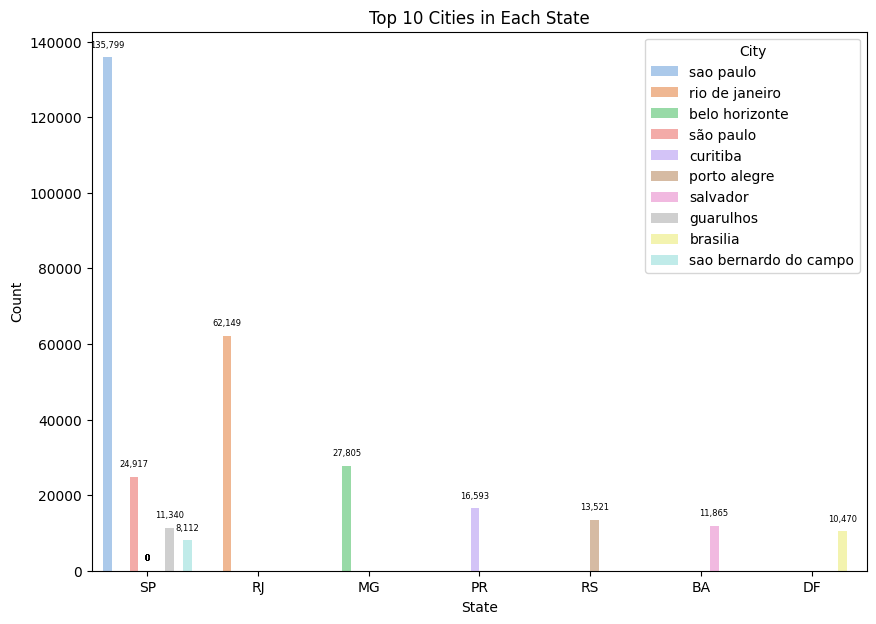

In [149]:
state_city_counts = geolocation_df.groupby(['geolocation_state', 'geolocation_city']).size().reset_index(name='count')
state_city_counts = state_city_counts.sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 7))
barplot = sns.barplot(x='geolocation_state', y='count', hue='geolocation_city', data=state_city_counts.head(10), palette='pastel')

# Menambahkan nilai pada setiap bar
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=6)

plt.title('Top 10 Cities in Each State')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='City', loc='upper right')
plt.show()


### Explore `customers_df` dan `geolocation_df`

Proses explore pada kedua tabel ini akan dilakukan dengan menggabungkan kedua tabel yaitu `customers_df` serta hasil dari pembersihan tabel `geolocation_df`, yaitu `median_geolocation` menggunakan kolom `customer_zip_code_prefix` dan `geolocation_zip_code_prefix`.

In [77]:
# Melakukan merge terhadap customers_df dan median_geolocation
customers_with_median_geolocation = pd.merge(
    left=customers_df, 
    right=median_geolocation,
    how='inner',
    left_on='customer_zip_code_prefix', 
    right_on='geolocation_zip_code_prefix',
)

customers_with_median_geolocation.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,franca,SP,-20.50207,-47.396822
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,14409,franca,SP,-20.50207,-47.396822
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,14409,franca,SP,-20.50207,-47.396822
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,14409,franca,SP,-20.50207,-47.396822
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,14409,franca,SP,-20.50207,-47.396822


In [78]:
customers_with_median_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148543 entries, 0 to 148542
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   customer_id                  148543 non-null  object 
 1   customer_unique_id           148543 non-null  object 
 2   customer_zip_code_prefix     148543 non-null  int64  
 3   customer_city                148543 non-null  object 
 4   customer_state               148543 non-null  object 
 5   geolocation_zip_code_prefix  148543 non-null  int64  
 6   geolocation_city             148543 non-null  object 
 7   geolocation_state            148543 non-null  object 
 8   geolocation_lat              148543 non-null  float64
 9   geolocation_lng              148543 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 11.3+ MB


In [79]:
customers_with_median_geolocation.describe()

,customer_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,148543.000000,148543.000000,148543.000000,148543.000000
mean,33558.937836,33558.937836,-21.263429,-46.339738
std,30096.493327,30096.493327,5.454045,3.840103
min,1003.000000,1003.000000,-33.691359,-98.484121
25%,8529.500000,8529.500000,-23.601068,-48.019438
50%,22713.000000,22713.000000,-22.975744,-46.649356
75%,58051.000000,58051.000000,-20.299473,-44.020323
max,99990.000000,99990.000000,45.065933,9.341528


Selanjutnya, data dari proses penggabungan kedua tabel tersebut akan di simpan dalam format csv, agar nantinya dapat digunakan pada visualisasi geolocation dalam dashboard.

In [80]:
# customers_with_median_geolocation.to_csv("geolocation.csv", index=False)

### Explore `orders_df`

In [81]:
# Buat kolom baru untuk menghitung selisih waktu pembelian barang dan pada saat barang tersebut sampai pada customer
delivery_time = orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']
orders_df["delivery_time (days)"] = round(delivery_time / pd.to_timedelta(1, unit='D'))

orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time (days)
2650,a79648ef5e1a257af5fde4c5f27040da,eb7d32b871d7e1d8f3dcce1aa4e095bd,delivered,2017-09-21 19:05:21,2017-09-21 19:24:21,2017-09-22 19:14:50,2017-10-16 18:17:55,2017-10-17,25.0
52008,ea54412cecde6581601103024747302d,b9a8de41629ac11ddfb40c3b80593758,delivered,2018-03-10 00:09:57,2018-03-10 00:28:19,2018-03-12 18:17:44,2018-03-27 21:16:58,2018-03-29,18.0
3305,d3d2abdcb92f954926408fc4e9088e45,ba8329f5610eea3af74dc1d1fe3e4564,delivered,2018-02-04 18:28:36,2018-02-06 05:31:52,2018-02-09 15:58:48,2018-02-16 14:44:44,2018-03-01,12.0
4162,a5d7b5b625f48f4af406a8b11bb59751,92dcd0241fba4e4253f99460cb9270d7,delivered,2017-12-18 16:00:07,2017-12-18 17:18:36,2017-12-21 18:57:12,2018-01-08 21:40:01,2018-01-11,21.0
92761,2ae1a1178ebaf2ed27989112cf9f4a2d,503cd4e9dd9a0aad568b6f3af8e32948,delivered,2018-01-01 14:37:33,2018-01-01 14:47:22,2018-01-10 17:48:34,2018-01-18 20:29:58,2018-02-08,17.0


In [82]:
status_pesanan = orders_df[orders_df['order_status'] == 'canceled']

status_pesanan 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time (days)
2921,1950d777989f6a877539f53795b4c3c3,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09,30.0
8791,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30,8.0
58266,770d331c84e5b214bd9dc70a10b829d0,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29,7.0
59332,8beb59392e21af5eb9547ae1a9938d06,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30,11.0
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25,36.0
94399,2c45c33d2f9cb8ff8b1c86cc28c11c30,de4caa97afa80c8eeac2ff4c8da5b72e,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08,31.0


In [83]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time (days)
count,96461,96461,96461,96461,96461,96461,96461,96461,96461.000000
unique,96461,96461,2,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96455,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544,12.517007
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000
25%,NaN,NaN,NaN,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00,7.000000
50%,NaN,NaN,NaN,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00,16.000000
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,210.000000


<Axes: >

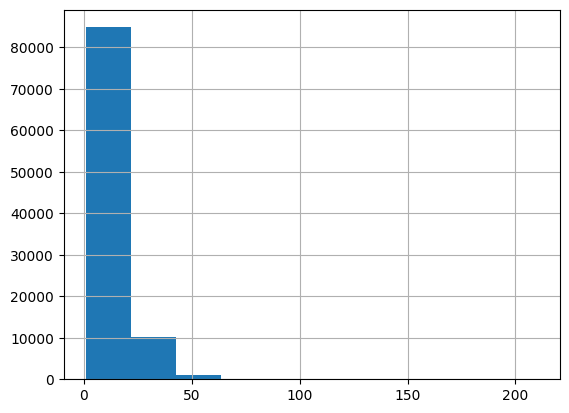

In [84]:
orders_df['delivery_time (days)'].hist()

In [85]:
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
64519,8f48e4ceff5e23adddb082418b0b97a4,116823daa8abb95786c5908fd8087b9e,88103,sao jose,SC,Active
47338,d6880369dd3f36a3f15b849edc8ab8d3,42fbe6ab4be2d0760e5a134370da0ff5,79500,paranaiba,MS,Active
61832,7ef663a8207160332584b183b6cdd739,3bb2ce27d2180fbe3a27d6a93b6890d3,4757,sao paulo,SP,Active
95707,feb1fcabc87e998d533ac59fe7cc0d1a,14576e3c4cbda70c7fc84decdd33214f,21060,rio de janeiro,RJ,Active
78507,8f5fedc7ca7d912c79405b85f9d9299b,4041baa51d9eae8f5955ccd4f02bb044,32210,contagem,MG,Active


In [86]:
customers_df.groupby(by="status").customer_id.count()

status
Active        96461
Non Active     2980
Name: customer_id, dtype: int64

In [87]:
orders_df.groupby(by="order_status").order_id.count()

order_status
canceled         6
delivered    96455
Name: order_id, dtype: int64

**FYI :** Jika diperhatikan, jumlah dari customer active atau customer yang pernah melakukan riwayat pemesanan sejumlah `96461`. Hal tersebut cocok dengan jumlah order status yaitu pesanan dibatalkan sebanyak `6` dan pesanan terkirim sebanyak `96455`, yang kalau dijumlahkan secara kesuluruhan maka sama dengan jumlah customer active, yaitu `96461`.

### Explore `orders_df` & `customers_df`

In [88]:
# Melakukan merge terhadap customers dan orders
customers_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="right",
    left_on="customer_id",
    right_on="customer_id"
)

customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time (days)
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0
2,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0


In [89]:
customers_orders_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15044
rio de janeiro            6603
belo horizonte            2697
brasilia                  2071
curitiba                  1489
campinas                  1406
porto alegre              1341
salvador                  1188
guarulhos                 1143
sao bernardo do campo      911
Name: order_id, dtype: int64

In [90]:
customers_orders_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    40489
RJ    12351
MG    11352
RS     5342
PR     4923
SC     3547
BA     3256
DF     2080
ES     1995
GO     1957
Name: order_id, dtype: int64

### Explore `products_df` & `product_category_name_df`

In [91]:
products_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
10215,c98141af5de0ad24a74753a12a9eb40b,relogios_presentes,56.0,539.0,1.0,350.0,18.0,12.0,16.0
5526,4630761de87581e8b659dc77bb7eb4ee,malas_acessorios,52.0,220.0,1.0,650.0,46.0,10.0,34.0
3942,391ae69031bcca826279a84f5c4034e8,utilidades_domesticas,56.0,613.0,5.0,3950.0,65.0,15.0,35.0
20631,5ceafdc1d838f693f92b8c2d8c3bdc86,automotivo,56.0,423.0,3.0,200.0,30.0,20.0,20.0
14872,ac4e5dadd39e115c7e7d1f72e8ef128b,cama_mesa_banho,55.0,280.0,2.0,7130.0,50.0,17.0,43.0


In [92]:
product_category_name_df.sample(5)

,product_category_name,product_category_name_english
46,artes,art
40,casa_construcao,home_construction
20,audio,audio
6,perfumaria,perfumery
27,construcao_ferramentas_jardim,costruction_tools_garden


Disini kita bisa menggabungkan kedua tabel tersebut berdasarkan kolom `product_category_name`

In [93]:
# Melakukan merge terhadap product_category_name_df dan products_df
products_product_category_name_df = pd.merge(
    left=product_category_name_df,
    right=products_df,
    how="right",
    left_on="product_category_name",
    right_on="product_category_name"
)

products_product_category_name_df.head()

,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,perfumaria,perfumery,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,artes,art,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,esporte_lazer,sports_leisure,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,bebes,baby,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,utilidades_domesticas,housewares,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Explore `sellers_df`, `order_items_df`, & `order_payments_df` 

In [94]:
sellers_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
2094,86ff3eaef0267069cc891a2ed9d10a17,88135,palhoca,SC
2218,bbaff50f3b708fda865918715276cd87,12940,atibaia,SP
2318,f524ad65d7e0f1daab730ef2d2e86196,99300,soledade,RS
2644,71039d19d4303bf9054d69e9a9236699,3018,sao paulo,SP
937,92d14edfb62ee5ae7fdff70b0f4e7233,9810,sao bernardo do campo,SP


In [95]:
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
46207,68f0f840a681f5c203a817cdb263b739,1,f94648b3948c15f95aad0b5902be6025,7c67e1448b00f6e969d365cea6b010ab,2017-10-06 03:24:28,101.99,21.37
44675,658f8d7112d20419aba9c6b7436b1af5,1,258ee266f0b142b30248b7c57b56d579,2379bdc3888025689a9deb7b141507d5,2018-02-15 18:55:27,7.90,8.11
39649,5a2cc0ecbae1c95bdaba1c3b0f5c6adc,1,14a931266aff3fb450bab1d076bdfd7d,a23266650e7c84bb93fbbba502137478,2017-09-20 21:24:44,21.90,21.15
101135,e560cc6069dbeeb38995174a47c13674,1,8c591ab0ca519558779df02023177f44,a1043bafd471dff536d0c462352beb48,2017-12-05 02:16:41,89.99,64.05
57223,82474078bf3b19dd0e8a32f116334255,1,30a47cc354b9607076272300c899dce9,855668e0971d4dfd7bef1b6a4133b41b,2018-06-21 00:30:27,55.00,12.83


Disini kita bisa menggabungkan kedua tabel tersebut berdasarkan kolom `seller_id`

In [96]:
# Melakukan merge terhadap sellers_df dan order_items_df
sellers_order_items_df = pd.merge(
    left=sellers_df,
    right=order_items_df,
    how="right",
    left_on="seller_id",
    right_on="seller_id"
)

sellers_order_items_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,2017-09-19 09:45:35,58.90,13.29
1,dd7ddc04e1b6c2c614352b383efe2d36,3471,sao paulo,SP,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,2017-05-03 11:05:13,239.90,19.93
2,5b51032eddd242adc84c38acab88f23d,37564,borda da mata,MG,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,2018-01-18 14:48:30,199.00,17.87
3,9d7a1d34a5052409006425275ba1c2b4,14403,franca,SP,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,2018-08-15 10:10:18,12.99,12.79
4,df560393f3a51e74553ab94004ba5c87,87900,loanda,PR,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,2017-02-13 13:57:51,199.90,18.14


In [97]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
50681,5850a159b783424b168c438678b6cc61,1,boleto,1,146.68
28542,987430b7ddb6c5c4a9a83505e40a5f4c,1,credit_card,3,84.23
22086,a975a4d132e3cd7cb429e0deffc7cf8d,1,credit_card,3,155.03
66157,f23a4132d42810c7f591d372282ae3eb,1,credit_card,1,88.28
92985,0410df130bab1cdcd13e23044ef9d76a,1,credit_card,2,124.67


Selanjutnya, kita akan mencoba menggabungkan hasil dari penggabungan tabel `sellers` dan `order_items` sebelumnya dengan tabel `order_payments` berdasarkan kolom `order_id`

In [98]:
# Melakukan merge terhadap sellers_order_items dan order_payments
sellers_order_payments_df = pd.merge(
    left=sellers_order_items_df,
    right=order_payments_df,
    how="right",
    left_on="order_id",
    right_on="order_id"
)

sellers_order_payments_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,213b25e6f54661939f11710a6fddb871,13321.0,salto,SP,b81ef226f3fe1789b1e8b2acac839d17,1.0,af74cc53dcffc8384b29e7abfa41902b,2018-05-02 22:15:09,79.80,19.53,1,credit_card,8,99.33
1,eaf6d55068dea77334e8477d3878d89e,4660.0,sao paulo,SP,a9810da82917af2d9aefd1278f1dcfa0,1.0,a630cc320a8c872f9de830cf121661a3,2018-07-02 11:18:58,17.00,7.39,1,credit_card,1,24.39
2,cc419e0650a3c5ba77189a1882b7556a,9015.0,santo andre,SP,25e8ea4e93396b6fa0d3dd708e76c1bd,1.0,2028bf1b01cafb2d2b1901fca4083222,2017-12-26 09:52:34,56.99,8.72,1,credit_card,1,65.71
3,da8622b14eb17ae2831f4ac5b9dab84a,13405.0,piracicaba,SP,ba78997921bbcdc1373bb41e913ab953,1.0,548e5bfe28edceab6b51fa707cc9556f,2017-12-12 12:13:20,89.90,17.88,1,credit_card,8,107.78
4,cca3071e3e9bb7d12640c9fbe2301306,14940.0,ibitinga,SP,42fdf880ba16b47b59251dd489d4441a,1.0,386486367c1f9d4f587a8864ccb6902b,2018-05-31 16:14:41,113.57,14.88,1,credit_card,2,128.45


In [99]:
sellers_order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118431 entries, 0 to 118430
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   seller_id               117601 non-null  object        
 1   seller_zip_code_prefix  117601 non-null  float64       
 2   seller_city             117601 non-null  object        
 3   seller_state            117601 non-null  object        
 4   order_id                118431 non-null  object        
 5   order_item_id           117601 non-null  float64       
 6   product_id              117601 non-null  object        
 7   shipping_limit_date     117601 non-null  datetime64[ns]
 8   price                   117601 non-null  float64       
 9   freight_value           117601 non-null  float64       
 10  payment_sequential      118431 non-null  int64         
 11  payment_type            118431 non-null  object        
 12  payment_installments    118431

In [100]:
# Lokasi penjual terbanyak
sellers_order_payments_df.groupby(['seller_city', 'seller_state']).size().idxmax()

('sao paulo', 'SP')

In [101]:
# Total pembayaran per metode pembayaran
sellers_order_payments_df.groupby('payment_type')['payment_value'].sum().sort_values(ascending = False)

payment_type
credit_card    15694885.84
boleto          4086820.71
voucher          432602.19
debit_card       256417.92
not_defined           0.00
Name: payment_value, dtype: float64

In [102]:
#Rata-rata total pembayaran untuk setiap metode pembayaran.
sellers_order_payments_df.groupby('payment_type')['payment_value'].mean().sort_values(ascending = False)

payment_type
credit_card    179.809887
boleto         177.402470
debit_card     151.011731
voucher         67.520242
not_defined      0.000000
Name: payment_value, dtype: float64

In [103]:
#Korelasi antara harga produk dan biaya pengiriman.
sellers_order_payments_df['price'].corr(sellers_order_payments_df['freight_value'])

0.41580856252754006

Nilai `0.4158` yang positif menunjukkan bahwa, secara umum, ketika harga produk naik, biaya pengiriman juga cenderung naik, dan sebaliknya. Korelasi sebesar `0.4158` termasuk dalam kategori hubungan yang moderat, yang menandakan bahwa `korelasinya tidak terlalu kuat`, tetapi `ada hubungan yang cukup signifikan` antara `harga produk` dan `biaya pengiriman`.

### Explore `products_product_category_name_df`, & `sellers_order_payments`

In [104]:
products_product_category_name_df.sample(5)

,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
3183,moveis_decoracao,furniture_decor,d14782a9f0856f169ee3b60303efa262,56.0,509.0,1.0,500.0,55.0,6.0,11.0
31439,beleza_saude,health_beauty,9091499533100191c6b89d09e43445e8,51.0,191.0,4.0,50.0,19.0,11.0,23.0
29940,beleza_saude,health_beauty,cb61986817d2a774d7c902dbbce84342,31.0,362.0,1.0,500.0,19.0,12.0,14.0
27803,beleza_saude,health_beauty,fa93c0bb0bce886ddae9cb218afb8033,49.0,1038.0,1.0,3700.0,21.0,16.0,31.0
15123,beleza_saude,health_beauty,20dd7f59c8d37692cd7aabe00f3af998,52.0,1709.0,1.0,625.0,29.0,20.0,24.0


In [105]:
sellers_order_payments_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
21410,cee48807215b30a12ca2ca10ffb5f250,11431.0,guaruja,SP,260c8e4c9a29e56ae6ee21c449f6834c,1.0,f834c914dc444ad2b175ff2a6f1ee1c7,2017-09-21 14:04:20,199.9,14.79,1,credit_card,5,214.69
13071,5343d0649eca2a983820bfe93fc4d17e,9270.0,santo andre,SP,257006b4652ed6214a889913fec6a5ca,1.0,680874c570dad71c0a2844cfbf417054,2018-03-28 19:48:07,39.0,19.32,2,voucher,1,165.00
34342,141440cad9341e553f8401c574a2aa38,85200.0,pitanga,PR,69aca49c98f05af05bec6fa1f87a3059,1.0,c848bbf7ec73272cce4df7509a71afde,2018-07-24 13:30:13,119.8,27.79,1,credit_card,2,147.59
8090,53e4c6e0f4312d4d2107a8c9cddf45cd,13920.0,pedreira,SP,09cd0ef00759c25af3a62b31366074bb,1.0,6503fb999235a191e5256051244c627c,2018-03-22 09:07:15,82.0,27.12,1,credit_card,10,109.12
57258,de722cd6dad950a92b7d4f82673f8833,51250.0,recife,PE,9908ae99065b70b8df618def52474f12,1.0,3dd2a17168ec895c781a9191c1e95ad7,2018-02-09 11:29:59,149.9,27.59,1,credit_card,3,177.49


Dalam explore data kali ini, kita akan mencoba menggabungkan tabel `products_product_category_name_df` dan `sellers_order_payments_df` berdasarkan kolom `product_id`

In [106]:
# Melakukan merge terhadap products_product_category_name_df dan sellers_order_payments_df
products_payments_df = pd.merge(
    left=products_product_category_name_df,
    right=sellers_order_payments_df,
    how="right",
    left_on="product_id",
    right_on="product_id"
)

products_payments_df.head()

,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,...,seller_state,order_id,order_item_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,casa_construcao,home_construction,af74cc53dcffc8384b29e7abfa41902b,57.0,921.0,8.0,800.0,17.0,27.0,17.0,...,SP,b81ef226f3fe1789b1e8b2acac839d17,1.0,2018-05-02 22:15:09,79.80,19.53,1,credit_card,8,99.33
1,automotivo,auto,a630cc320a8c872f9de830cf121661a3,59.0,1274.0,2.0,150.0,16.0,6.0,11.0,...,SP,a9810da82917af2d9aefd1278f1dcfa0,1.0,2018-07-02 11:18:58,17.00,7.39,1,credit_card,1,24.39
2,perfumaria,perfumery,2028bf1b01cafb2d2b1901fca4083222,54.0,1536.0,2.0,250.0,20.0,8.0,21.0,...,SP,25e8ea4e93396b6fa0d3dd708e76c1bd,1.0,2017-12-26 09:52:34,56.99,8.72,1,credit_card,1,65.71
3,cama_mesa_banho,bed_bath_table,548e5bfe28edceab6b51fa707cc9556f,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,...,SP,ba78997921bbcdc1373bb41e913ab953,1.0,2017-12-12 12:13:20,89.90,17.88,1,credit_card,8,107.78
4,cama_mesa_banho,bed_bath_table,386486367c1f9d4f587a8864ccb6902b,54.0,120.0,1.0,835.0,40.0,9.0,33.0,...,SP,42fdf880ba16b47b59251dd489d4441a,1.0,2018-05-31 16:14:41,113.57,14.88,1,credit_card,2,128.45


In [107]:
products_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118431 entries, 0 to 118430
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_category_name          115902 non-null  object        
 1   product_category_name_english  115877 non-null  object        
 2   product_id                     117601 non-null  object        
 3   product_name_lenght            115902 non-null  float64       
 4   product_description_lenght     115902 non-null  float64       
 5   product_photos_qty             115902 non-null  float64       
 6   product_weight_g               115902 non-null  float64       
 7   product_length_cm              115902 non-null  float64       
 8   product_height_cm              115902 non-null  float64       
 9   product_width_cm               115902 non-null  float64       
 10  seller_id                      117601 non-null  object        
 11  

In [108]:
products_payments_df.groupby(by=['payment_type', 'product_category_name_english']).agg({
    "order_item_id": "sum",
    "price": "sum",
})

order_item_id     price
payment_type product_category_name_english                         
boleto       agro_industry_and_commerce              80.0  20552.30
             air_conditioning                        86.0  10551.04
             art                                     49.0  10650.53
             arts_and_craftmanship                    8.0    565.67
             audio                                   90.0   7700.54
...                                                   ...       ...
voucher      stationery                             151.0   9257.96
             tablets_printing_image                   4.0    311.90
             telephony                              230.0  15266.05
             toys                                   213.0  16394.52
             watches_gifts                          261.0  48118.70

[263 rows x 2 columns]

### Explore `products_payments_df`, & `order_reviews_df`

Setelah melakukan penggabungan dari pada tabel `products_product_category_name_df` dan `sellers_order_payments`, selanjutnya kita akan melakukan penggabungan dari hasil kedua tabel tersebut dengan `order_reviews_df` untuk mengetahui reviews dari costumers terkait produk yang dibeli berdasarkan kolom `order_id`

In [109]:
order_reviews_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
51499,ceedebddd1fe3d8c887cf56ec8c02864,783fc14b5c2cdc4ba848ad7f129c5df4,1,very bad,Não recebi meu produto,2018-01-04,2018-01-05 00:26:46
89599,775317ddaf361ce6f89842b8630f7b09,91c8553552838cffe0bdcf5675b7a3e3,5,very good,very good,2017-12-21,2017-12-23 21:50:56
52520,fe655e924c70b836434e6f42cf7e5e1e,15b43c7df18210a4d78cb043992d1ef5,5,Muito bom,very good,2018-07-12,2018-07-19 19:35:48
95285,73c1871f3803953cc5b033c7e4a0b370,72fac1240f2dbf9cb8947475f525d588,5,very good,very good,2017-11-24,2017-11-27 02:20:25
10610,f92ad972487e90b7d29dbc6defcd5f4f,c1219b88f5d48e3d0dd3229cbd88a722,5,very good,Gostei muito,2017-06-15,2017-06-15 23:43:33


In [110]:
# Melakukan merge terhadap products_payments_df dan order_reviews_df
products_reviews_merged_df = pd.merge(
    left=products_payments_df,
    right=order_reviews_df,
    how="right",
    left_on="order_id",
    right_on="order_id"
)

products_reviews_merged_df

,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,esporte_lazer,sports_leisure,fd25ab760bfbba13c198fa3b4f1a0cd3,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,...,1.0,credit_card,8.0,397.26,7bc2406110b926393aa56f80a40eba40,4,good,good,2018-01-18,2018-01-18 21:46:59
1,esporte_lazer,sports_leisure,fd25ab760bfbba13c198fa3b4f1a0cd3,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,...,1.0,credit_card,8.0,397.26,7bc2406110b926393aa56f80a40eba40,4,good,good,2018-01-18,2018-01-18 21:46:59
2,informatica_acessorios,computers_accessories,be0dbdc3d67d55727a65d4cd696ca73c,47.0,493.0,1.0,245.0,19.0,14.0,14.0,...,1.0,credit_card,1.0,88.09,80e641a11e56f04c1ad469d5645fdfde,5,very good,very good,2018-03-10,2018-03-11 03:05:13
3,informatica_acessorios,computers_accessories,d1c427060a0f73f6b889a5c7c61f2ac4,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,...,1.0,credit_card,1.0,194.12,228ce5500dc1d8e020d8d1322874b6f0,5,very good,very good,2018-02-17,2018-02-18 14:36:24
4,ferramentas_jardim,garden_tools,52c80cedd4e90108bf4fa6a206ef6b03,33.0,2188.0,2.0,7650.0,20.0,20.0,20.0,...,1.0,credit_card,1.0,222.84,e64fb393e7b32834bb789ff8bb30750e,5,very good,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118139,moveis_decoracao,furniture_decor,4fb209073dc2ab6a6d3c259a7c285501,56.0,623.0,1.0,7250.0,100.0,25.0,25.0,...,1.0,credit_card,8.0,287.97,574ed12dd733e5fa530cfd4bbf39d7c9,5,very good,very good,2018-07-07,2018-07-14 17:18:30
118140,brinquedos,toys,3a33c980b62eb1ef3b8ae61b6fc6fe55,51.0,465.0,1.0,2363.0,23.0,27.0,19.0,...,1.0,credit_card,1.0,209.76,f3897127253a9592a73be9bdfdf4ed7a,5,very good,very good,2017-12-09,2017-12-11 20:06:42
118141,papelaria,stationery,8ba0118a487ec8671aed57e5ef846574,45.0,283.0,3.0,4100.0,40.0,37.0,29.0,...,1.0,credit_card,6.0,231.56,b3de70c89b1510c4cd3d0649fd302472,5,very good,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
118142,esporte_lazer,sports_leisure,73a7fbf8c1048131f3b531af31bcdf0e,58.0,998.0,5.0,600.0,16.0,10.0,11.0,...,1.0,credit_card,1.0,66.41,1adeb9d84d72fe4e337617733eb85149,4,good,good,2018-07-01,2018-07-02 12:59:13


In [111]:
products_reviews_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118144 entries, 0 to 118143
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_category_name          115633 non-null  object        
 1   product_category_name_english  115608 non-null  object        
 2   product_id                     117329 non-null  object        
 3   product_name_lenght            115633 non-null  float64       
 4   product_description_lenght     115633 non-null  float64       
 5   product_photos_qty             115633 non-null  float64       
 6   product_weight_g               115633 non-null  float64       
 7   product_length_cm              115633 non-null  float64       
 8   product_height_cm              115633 non-null  float64       
 9   product_width_cm               115633 non-null  float64       
 10  seller_id                      117329 non-null  object        
 11  

In [112]:
products_reviews_merged_df[['price', 'review_score']].corr()

,price,review_score
price,1.000000,-0.004515
review_score,-0.004515,1.000000


Korelasi antara `price` dan `review_score` sangat dekat dengan 0, yaitu `-0.004515`. Ini menunjukkan bahwa `tidak ada korelasi yang signifikan` antara `harga (price)` produk dan `skor ulasan (review_score)`. Dengan kata lain, perubahan dalam `harga produk tidak memiliki dampak yang konsisten pada skor ulasan pelanggan, dan sebaliknya`.

Selanjutnya, saya mencoba untuk menganalisa jumlah persentase pada masing-masing value dari review_score.

In [113]:
review_score_distribution = (products_reviews_merged_df['review_score'].value_counts(normalize=True) * 100).round(0).astype(int)
review_score_distribution.astype(str) + '%'

review_score
5    56%
4    19%
1    13%
3     8%
2     4%
Name: proportion, dtype: object

### Explore `All Data`

Explore terakhir yang akan dilakukan adalah menggabungkan hasil merge tabel `customers` dan `orders` yaitu `customers_orders_df`, dan hasil merge tabel sebelumnya yaitu `products_reviews_merged_df`. Hasil dari merge tersebut akan ditampung dalam data frame baru yaitu `all_df`

In [114]:
customers_orders_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time (days)
62694,fdc9165fcab1cf2e514fae8b2024e81b,22978dacc101d3d7cece498a2ce05ae4,29182,serra,ES,Active,99a7badd46fd46df1e27a5cffaedf67f,delivered,2018-01-26 17:34:32,2018-01-27 11:16:21,2018-01-29 20:32:28,2018-02-17 00:19:14,2018-02-20,21.0
54643,d1e8d2dce7cc66c32405d66e9eda6b82,0d143948c843840b6a1971d7e717bd5a,11520,cubatao,SP,Active,87db440948f84c0c68a2311dba047650,delivered,2018-02-14 20:41:35,2018-02-14 20:55:50,2018-02-15 12:07:31,2018-02-27 23:59:07,2018-03-08,13.0
32231,118801ab348bf60aa1f636ef333ab3b3,bc7bbc9349d099da09d79bbaf1b3d480,20771,rio de janeiro,RJ,Active,89375eabf1f0c640f093abce3f12a9f3,delivered,2018-04-10 21:58:17,2018-04-10 22:11:13,2018-04-13 23:14:41,2018-04-20 22:11:47,2018-05-15,10.0
20615,8dbd900d6aac6fead528237f425c51d6,c4c49bb84c2b1cdcd7980ef859718d05,37445,cruzilia,MG,Active,e2e62108a0daf44573986d823484239a,delivered,2017-09-15 12:34:25,2017-09-15 12:50:34,2017-09-18 19:51:48,2017-09-22 20:59:00,2017-10-06,7.0
88153,7a145c216b8956a484a50e67e385af99,019cd54cc450bdfb2de3e83dced0c511,14790,guaira,SP,Active,5c691ba7fb954b25c03ed3008a591952,delivered,2017-08-02 08:39:37,2017-08-02 08:55:10,2017-08-07 21:06:03,2017-08-10 19:35:37,2017-08-24,8.0


In [115]:
products_reviews_merged_df.sample(5)

,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
78435,relogios_presentes,watches_gifts,8afd2ec5bf821e4d1a061e7ca31cac24,60.0,522.0,4.0,300.0,16.0,2.0,11.0,...,1.0,credit_card,8.0,181.26,638bd1169d6da5b5a4fb2269d01b59ea,5,very good,very good,2018-08-10,2018-08-11 15:47:31
110430,ferramentas_jardim,garden_tools,98a8c2fa16d7239c606640f5555768e4,39.0,500.0,1.0,8325.0,43.0,14.0,33.0,...,1.0,credit_card,2.0,150.10,006d91c83696c3868dd24533c65ce0be,5,very good,"Além de linda chegou com uma semana, bem antes...",2017-10-11,2017-10-14 04:46:00
104577,informatica_acessorios,computers_accessories,6d2fde7d12bb6ff367dbda120ba8828e,60.0,704.0,1.0,200.0,39.0,9.0,11.0,...,1.0,credit_card,1.0,33.85,f947993c8ee232258b414bb2c16a387d,3,neutral,Nao lembro de ter lido no anuncio que se trata...,2017-07-12,2017-07-13 14:11:02
39464,papelaria,stationery,d189fbf8b5d79a670cebcaaad68d77b2,49.0,453.0,1.0,3000.0,30.0,10.0,30.0,...,1.0,credit_card,1.0,76.68,da03acfa02ef3e1fd25b732d4a83b22d,5,very good,very good,2017-04-22,2017-04-23 12:16:18
58221,utilidades_domesticas,housewares,0ae935aec15938b92f6667ec2fde2dc2,42.0,542.0,2.0,900.0,25.0,10.0,36.0,...,1.0,credit_card,1.0,186.62,2db6e60632d7a5bc2f5f807a9d448d24,1,very bad,Paguei por 2 kits e só recebi 1. O que houve?,2018-02-10,2018-02-11 11:35:11


In [116]:
# Melakukan merge terhadap products_reviews_merged_df dan customers_orders_df
all_df = pd.merge(
    left=products_reviews_merged_df,
    right=customers_orders_df,
    how="right",
    left_on="order_id",
    right_on="order_id"
)

all_df.sample(5)

,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,...,customer_city,customer_state,status,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time (days)
67299,moveis_cozinha_area_de_servico_jantar_e_jardim,kitchen_dining_laundry_garden_furniture,c075b8e131353552218860f1c421e4ef,30.0,1565.0,4.0,1750.0,20.0,16.0,30.0,...,belem,PA,Active,delivered,2017-06-07 07:58:09,2017-06-07 08:10:13,2017-06-13 08:16:38,2017-06-28 12:32:01,2017-07-10,21.0
1266,moveis_decoracao,furniture_decor,76426979761800347e9ea486ece96976,56.0,374.0,1.0,800.0,40.0,5.0,11.0,...,sorocaba,SP,Active,delivered,2018-04-23 17:41:34,2018-04-24 18:34:54,2018-04-24 19:22:41,2018-04-27 21:44:40,2018-05-16,4.0
95773,brinquedos,toys,e2c3ed9aaddfd2312a6a5fe9b3ddadd3,53.0,579.0,1.0,675.0,22.0,24.0,21.0,...,rio de janeiro,RJ,Active,delivered,2017-10-11 12:55:32,2017-10-11 13:07:13,2017-10-13 15:55:53,2017-10-16 21:19:22,2017-10-24,5.0
6747,utilidades_domesticas,housewares,2eb384017334e47db9ccf364216799df,59.0,887.0,1.0,5500.0,32.0,32.0,32.0,...,arraial do cabo,RJ,Active,delivered,2017-11-28 19:24:34,2017-11-28 19:35:48,2017-12-06 12:09:34,2017-12-21 15:03:31,2017-12-21,23.0
3503,agro_industria_e_comercio,agro_industry_and_commerce,423a6644f0aa529e8828ff1f91003690,54.0,2352.0,3.0,5800.0,30.0,30.0,20.0,...,itapetininga,SP,Active,delivered,2017-12-01 13:01:47,2017-12-03 12:58:22,2017-12-05 23:29:54,2017-12-21 03:34:17,2017-12-28,20.0


In [117]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115489 entries, 0 to 115488
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_category_name          113216 non-null  object        
 1   product_category_name_english  113193 non-null  object        
 2   product_id                     114842 non-null  object        
 3   product_name_lenght            113216 non-null  float64       
 4   product_description_lenght     113216 non-null  float64       
 5   product_photos_qty             113216 non-null  float64       
 6   product_weight_g               113216 non-null  float64       
 7   product_length_cm              113216 non-null  float64       
 8   product_height_cm              113216 non-null  float64       
 9   product_width_cm               113216 non-null  float64       
 10  seller_id                      114842 non-null  object        
 11  

Setelah menggabungkan semua kolom dari proses explore yang sudah dilakukan diatas, maka didapatkan sebanyak `42 kolom`. Semua kolom tersebut nantinya akan saya simpan dalam file `main_data.csv` untuk digunakan dalam proses perancangan `dashboard`.

In [118]:
avg_payment_info = all_df.groupby('payment_type').agg({'price': 'mean', 'freight_value': 'mean'})
avg_payment_info

,price,freight_value
payment_type,,
boleto,103.811204,19.671518
credit_card,125.466993,20.103775
debit_card,107.462443,18.497207
voucher,102.481454,19.692592


In [119]:
all_df.groupby('review_score').agg({'price': 'sum', 'freight_value': 'sum'})

,price,freight_value
review_score,,
1.0,1616310.69,276967.05
2.0,449963.87,81476.83
3.0,1050453.53,195321.70
4.0,2631773.38,445707.77
5.0,8006182.62,1294455.70


In [120]:
## all_df.to_csv("main_data.csv", index=False)

### **Visualization & Explanatory Analysis**

### **Bagaimana demografi pelanggan yang kita miliki?**

#### **Berdasarkan Negara Bagian**

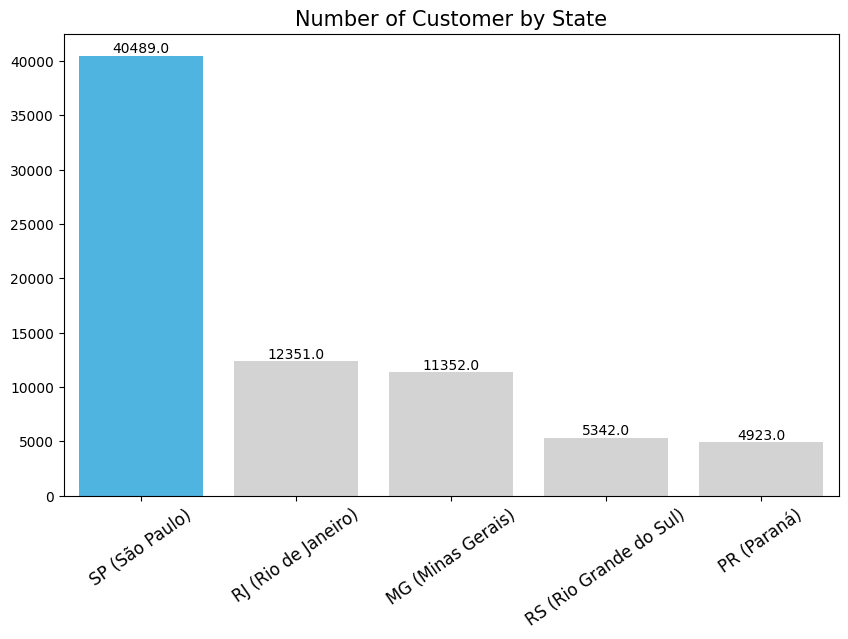

In [121]:
bystate_df = all_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

# Buat dictionary pemetaan
state_mapping = {
    'SP': 'SP (São Paulo)',
    'RJ': 'RJ (Rio de Janeiro)',
    'MG': 'MG (Minas Gerais)',
    'RS': 'RS (Rio Grande do Sul)',
    'PR': 'PR (Paraná)'
}

colors_ = ["#38BDF8", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Terapkan pemetaan pada DataFrame
bystate_df['customer_state'] = bystate_df['customer_state'].replace(state_mapping)

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    y="customer_count",
    x="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False).head(5),
    palette=colors_,
    hue="customer_state",
    legend=False
)
plt.title("Number of Customer by State", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12, rotation=35)

# Menambahkan label nilai pada setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

#### **Berdasarkan Letak Geografis Pelanggan** 

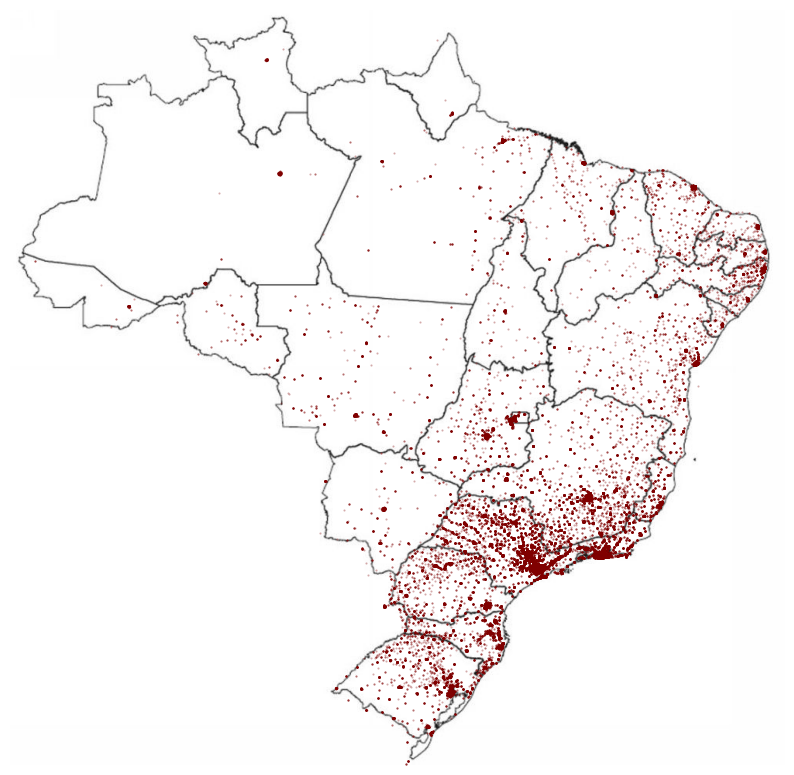

In [122]:
brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'), 'jpg')

# Create a scatter plot
ax = customers_with_median_geolocation.drop_duplicates(subset='customer_unique_id').plot(
    kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10, 10), alpha=0.3, s=0.3, c='maroon'
)

# Turn off the axis
plt.axis('off')

# Overlay the map image on the scatter plot
plt.imshow(brazil, extent=[-73.98283055, -33.8, -33.75116944, 5.4])

# Show the plot
plt.show()

Berdasarkan visualisasi yang telah disajikan, terlihat bahwa jumlah pelanggan lebih tinggi di wilayah `tenggara` dan `selatan`. Selain itu, data juga mengindikasikan bahwa kota-kota yang menjadi pusat pemerintahan, seperti São Paulo, Rio de Janeiro, Porto Alegre, dan sebagainya, memiliki jumlah pelanggan yang lebih besar.

#### **Berdasarkan Tipe Pembayaran** 

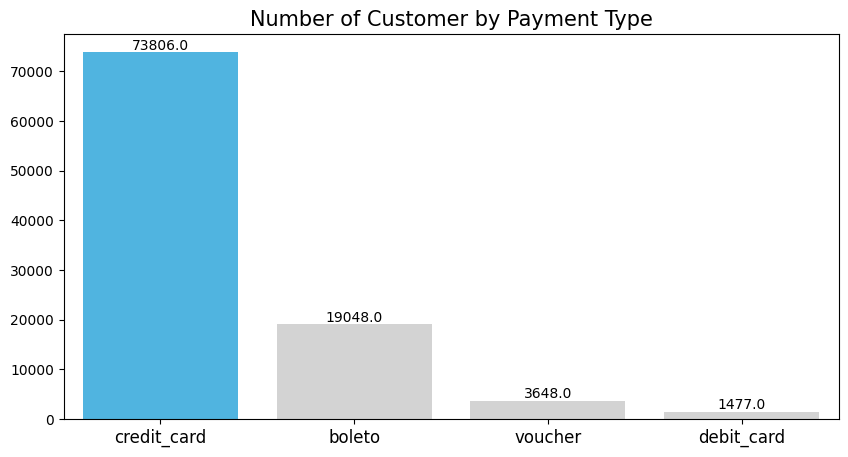

In [123]:
bypayment_df = all_df.groupby(by="payment_type").customer_id.nunique().reset_index()
bypayment_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

colors_ = ["#38BDF8", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
ax = sns.barplot(
    y="customer_count",
    x="payment_type",
    data=bypayment_df.sort_values(by="customer_count", ascending=False),
    palette=colors_,
    hue="payment_type",
    legend=False
)
plt.title("Number of Customer by Payment Type", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)

# Menambahkan label nilai pada setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

#### **Berdasarkan Review Score** 

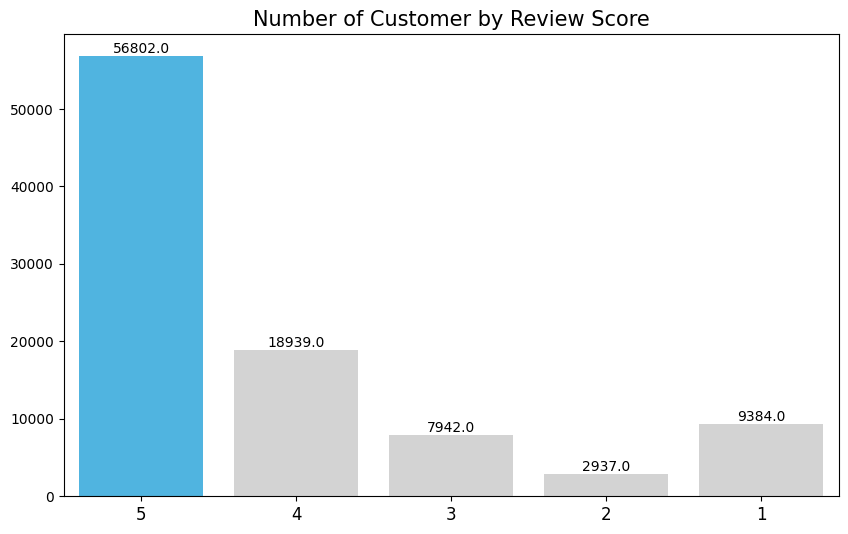

In [124]:
byrating_df = all_df.groupby(by="review_score").customer_id.nunique().reset_index()
byrating_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

byrating_df['review_score'] = pd.Categorical(byrating_df['review_score'], [5, 4, 3, 2, 1])

colors_ = ["#38BDF8", "#D3D3D3", "#D3D3D3", "#D3D3D3",  "#D3D3D3"]

plt.figure(figsize=(10, 6))

ax = sns.barplot(
    y="customer_count",
    x="review_score",
    data=byrating_df.sort_values(by="customer_count", ascending=False),
    palette=colors_,
    hue="review_score",
    legend=False
)
plt.title("Number of Customer by Review Score", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)

# Menambahkan label nilai pada setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

### **Produk apa yang paling banyak dan paling sedikit terjual?**

In [125]:
product_sales = all_df.groupby("product_category_name_english").order_item_id.sum().sort_values(ascending=False).reset_index()

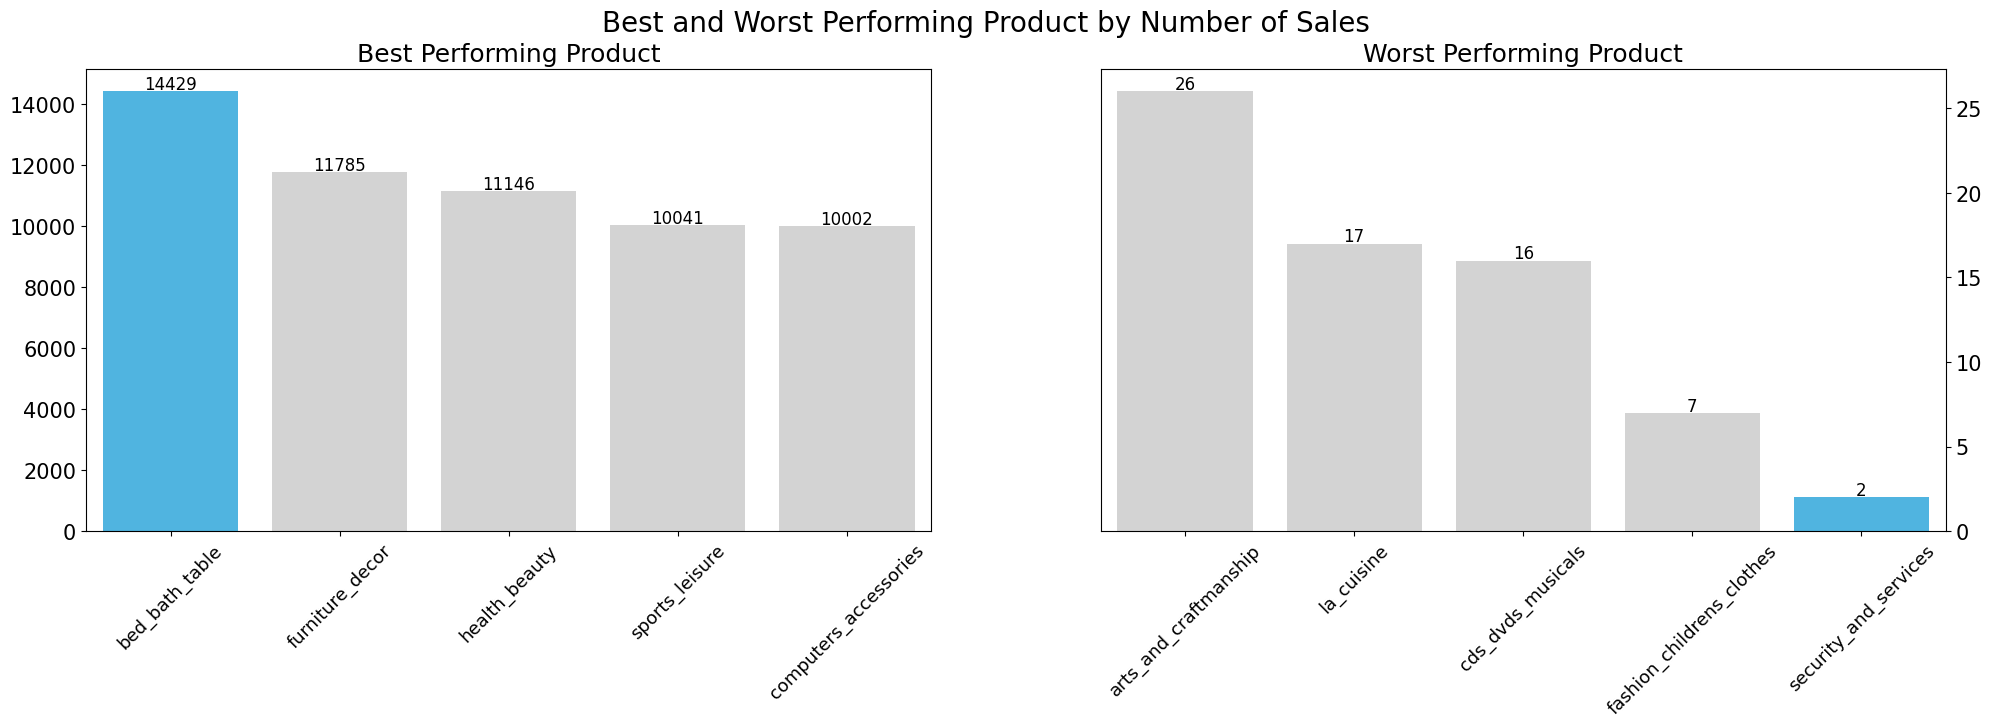

In [126]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#38BDF8", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="product_category_name_english", y="order_item_id", data=product_sales.head(5), palette=colors, hue="product_category_name_english", ax=ax[0], legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)
ax[0].tick_params(axis='x', labelsize=13, rotation=45)

# Menambahkan nilai di sumbu x untuk ax[0]
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')


sns.barplot(x="product_category_name_english", y="order_item_id", data=product_sales.tail(5).sort_values(by="order_item_id", ascending=True), palette=colors, hue="product_category_name_english", ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].tick_params(axis='x', labelsize=13, rotation=45)

for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

### **Bagaimana performa penjualan dan revenue perusahaan dalam setiap bulan (2016-09 sampai 2018-08) ?**

In [127]:
all_df['order_month'] = all_df['order_purchase_timestamp'].dt.to_period('M')
monthly_orders = all_df.groupby('order_month')['order_id'].nunique()
monthly_revenue = all_df.groupby('order_month')['price'].sum()

# Menggabungkan hasil pengelompokan menjadi satu DataFrame
result_df = pd.DataFrame({
    'order_month': monthly_revenue.index,
    'monthly_orders': monthly_orders.values,
    'monthly_revenue': monthly_revenue.values
})

# Menampilkan hasil
result_df

,order_month,monthly_orders,monthly_revenue
0,2016-09,1,0.00
1,2016-10,270,41725.81
2,2016-12,1,10.90
3,2017-01,748,120043.56
4,2017-02,1641,243094.32
5,2017-03,2546,376960.59
6,2017-04,2303,359519.51
7,2017-05,3545,527429.72
8,2017-06,3135,442939.20
9,2017-07,3872,514111.62


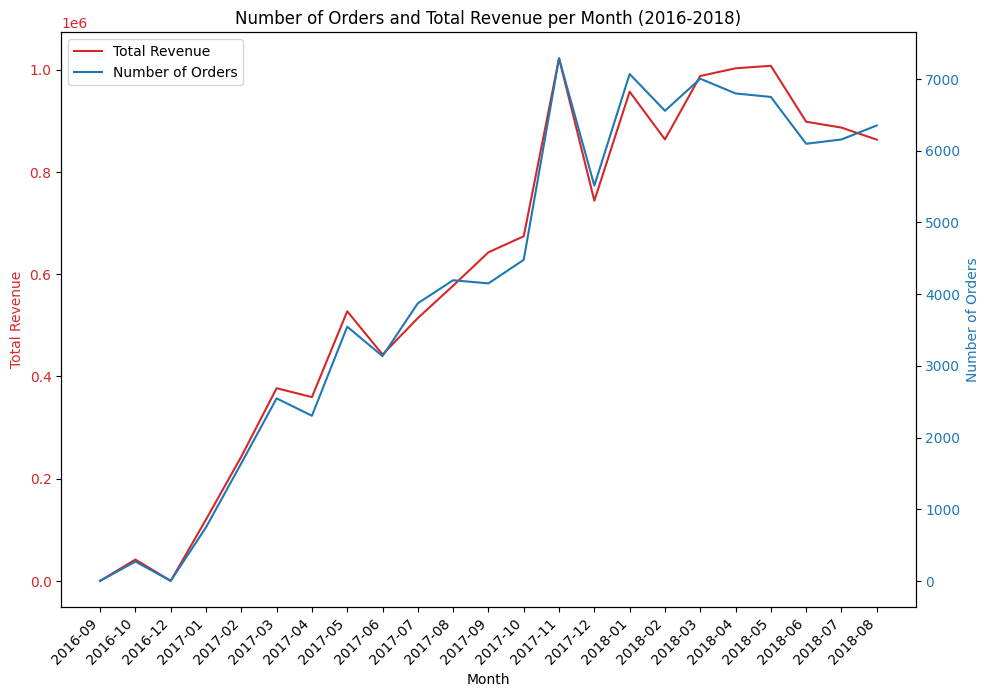

In [128]:
monthly_revenue.index = monthly_revenue.index.astype(str)
monthly_orders.index = monthly_orders.index.astype(str)

# Mengatur lebar dan tinggi gambar
fig, ax1 = plt.subplots(figsize=(10, 7))

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Revenue', color=color)
ax1.plot(monthly_revenue.index, monthly_revenue, color=color, label='Total Revenue')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Number of Orders', color=color)
ax2.plot(monthly_orders.index, monthly_orders, color=color, label='Number of Orders')
ax2.tick_params(axis='y', labelcolor=color)

# Mengatur posisi tick dan label pada sumbu x
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(monthly_revenue.index, rotation=45, ha='right')

# Menambahkan keterangan (legend) di sebelah kiri atas
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0, 1))

fig.tight_layout()
plt.title('Number of Orders and Total Revenue per Month (2016-2018)')
plt.show()


### **RFM Analysis**

In [129]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "price": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,89.80
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,179.99
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,149.90
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,93.00


In [130]:
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,89.80,288
1,000161a058600d5901f007fab4c27140,2017-07-16,1,54.90,409
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,179.99,547
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1,149.90,378
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1,93.00,149


In [131]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288
1,000161a058600d5901f007fab4c27140,1,54.90,409
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378
4,000379cdec625522490c315e70c7a9fb,1,93.00,149


In [132]:
rfm_df.describe()

,frequency,monetary,recency
count,96461.0,96461.000000,96461.000000
mean,1.0,142.593215,239.640953
std,0.0,236.017392,152.830809
min,1.0,0.000000,0.000000
25%,1.0,45.970000,116.000000
50%,1.0,89.000000,221.000000
75%,1.0,152.000000,349.000000
max,1.0,13440.000000,713.000000


In [133]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288
64304,aa5e0a0c36015d39de864189a2b00b09,1,76.00,15
64313,aa6190994371836fc1d4596edd827abd,1,210.00,244
64312,aa606152f23a5fa9ba3d0b87f7a492e8,1,55.00,225
64311,aa601b3c45980c0918042d5ca7a25054,1,49.99,167


In [134]:
rfm_df.sort_values(by="monetary", ascending=False).head(5)

,customer_id,frequency,monetary,recency
8291,1617b1357756262bfa56ab541c47bc16,1,13440.00,334
84044,de832e8dbb1f588a47013e53feaa67cc,1,10856.10,457
37453,63b964e79dee32a3587651701a2b8dbf,1,9888.00,196
41745,6f241d5bbb142b6f764387c8c270645a,1,9520.14,111
55123,926b6a6fb8b6081e00b335edaf578d35,1,7998.00,498


C:\Users\ASPIRE 5\AppData\Local\Temp\ipykernel_6972\927965293.py:6: UserWarning: The palette list has more values (5) than needed (1), which may not be intended.
  freq_plot = sns.barplot(


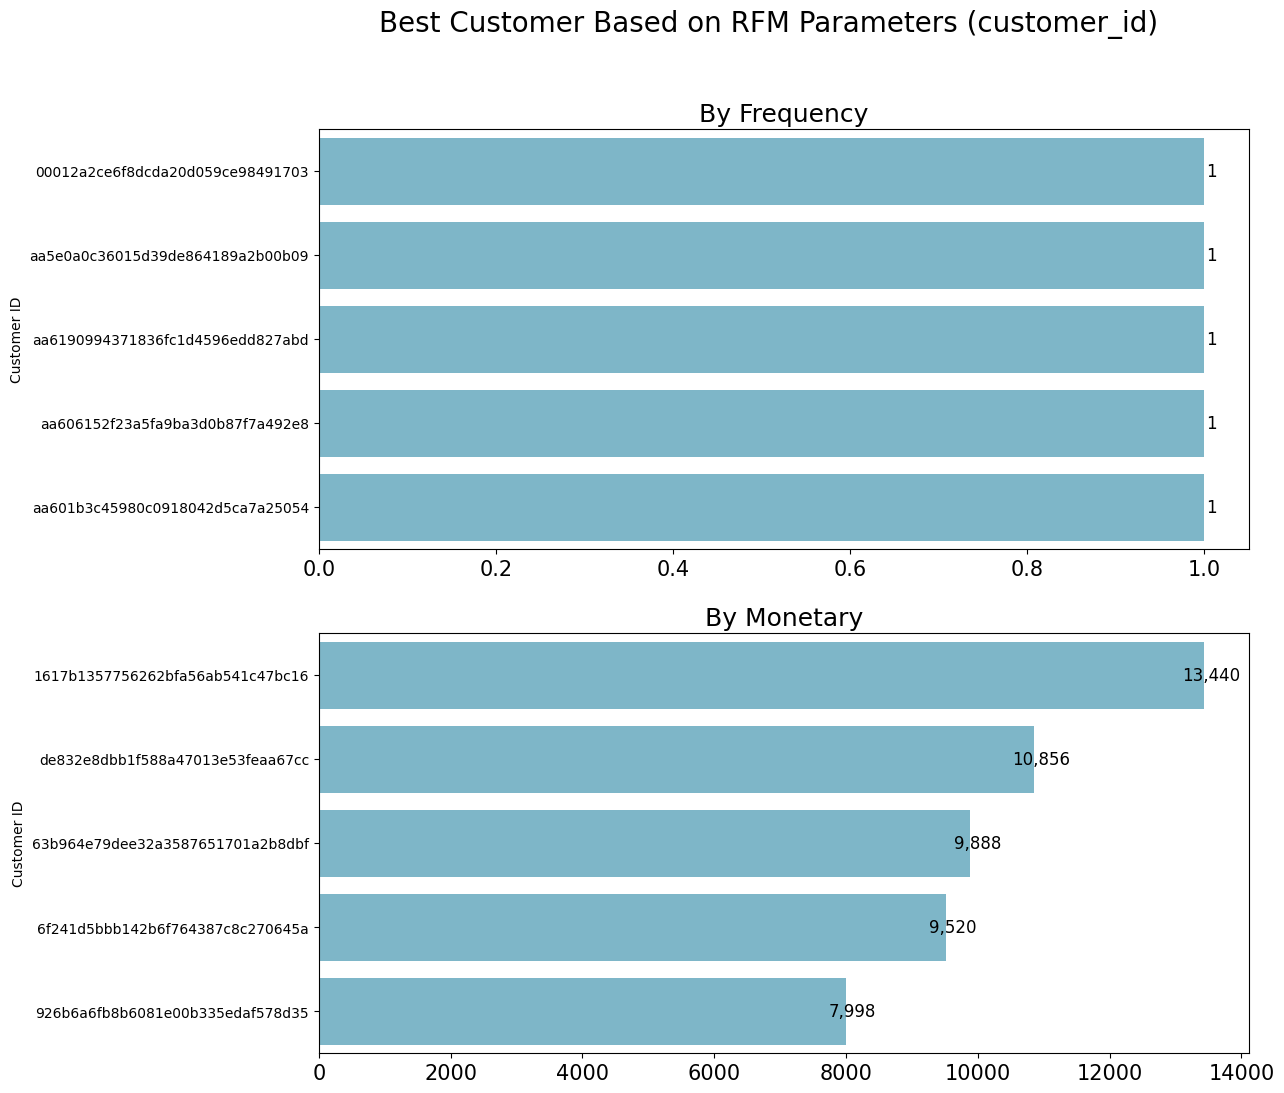

In [145]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Grafik pertama (By Frequency)
freq_plot = sns.barplot(
    y="customer_id", 
    x="frequency", 
    data=rfm_df.sort_values(by="frequency", ascending=False).head(5), 
    palette=colors,
    hue="frequency",
    legend=False,
    ax=ax[0]
)
ax[0].set_ylabel("Customer ID")
ax[0].set_xlabel(None)
ax[0].set_title("By Frequency", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

# Menambahkan nilai pada grafik pertama
for p in freq_plot.patches:
    ax[0].annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(5, 0), textcoords='offset points', fontsize=12)

# Grafik kedua (By Monetary)
monetary_plot = sns.barplot(
    y="customer_id", 
    x="monetary", 
    data=rfm_df.sort_values(by="monetary", ascending=False).head(5), 
    palette=colors, 
    hue="monetary",
    legend=False,
    ax=ax[1]
)
ax[1].set_ylabel("Customer ID")
ax[1].set_xlabel(None)
ax[1].set_title("By Monetary", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Menambahkan nilai pada grafik kedua
for p in monetary_plot.patches:
    ax[1].annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(5, 0), textcoords='offset points', fontsize=12)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()


### **Mengurutkan customer berdasarkan recency, frequency, & monetary score**

In [136]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288,32945.5,48231.0,48721.5
1,000161a058600d5901f007fab4c27140,1,54.90,409,16036.0,48231.0,30320.0
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547,2635.0,48231.0,77653.0
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378,20206.5,48231.0,71268.5
4,000379cdec625522490c315e70c7a9fb,1,93.00,149,64649.5,48231.0,51048.0


In [137]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100
 
rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
 
rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288,34.155988,100.0,50.509014
1,000161a058600d5901f007fab4c27140,1,54.90,409,16.625197,100.0,31.432392
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547,2.731816,100.0,80.501965
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378,20.948930,100.0,73.883227
4,000379cdec625522490c315e70c7a9fb,1,93.00,149,67.024861,100.0,52.920870


In [138]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,3.10
1,000161a058600d5901f007fab4c27140,2.42
2,0001fd6190edaaf884bcaf3d49edf079,3.71
3,0002414f95344307404f0ace7a26f1d5,3.66
4,000379cdec625522490c315e70c7a9fb,3.41
5,0004164d20a9e969af783496f3408652,2.50
6,000419c5494106c306a97b5635748086,2.33


### **Segmentasi customer berdasarkan RFM_score**

In [139]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,3.10,Medium value customer
1,000161a058600d5901f007fab4c27140,2.42,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,3.71,Medium value customer
3,0002414f95344307404f0ace7a26f1d5,3.66,Medium value customer
4,000379cdec625522490c315e70c7a9fb,3.41,Medium value customer
5,0004164d20a9e969af783496f3408652,2.50,Low value customers
6,000419c5494106c306a97b5635748086,2.33,Low value customers
7,00046a560d407e99b969756e0b10f282,3.60,Medium value customer
8,00050bf6e01e69d5c0fd612f1bcfb69c,2.80,Low value customers
9,000598caf2ef4117407665ac33275130,4.95,Top customers


In [140]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,15659
1,Low value customers,40477
2,Medium value customer,33868
3,Top customers,5355
4,lost customers,1102


In [141]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

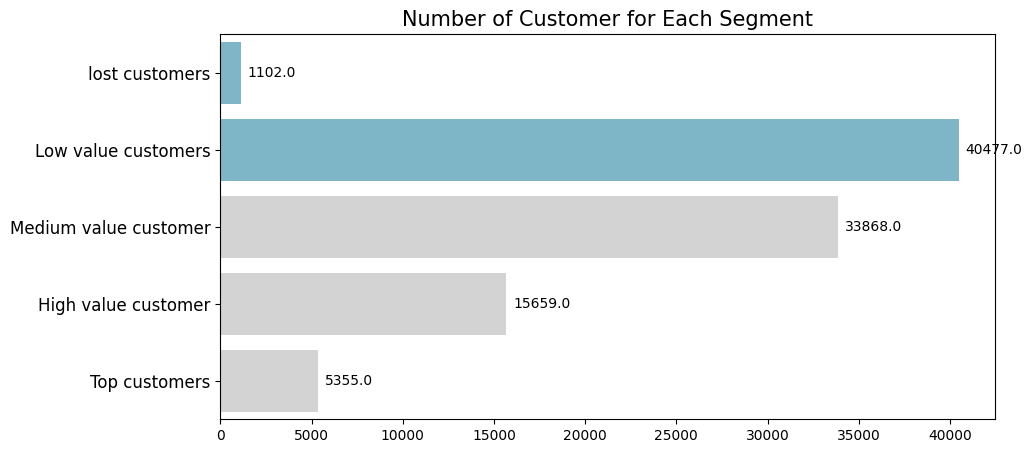

In [142]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Membuat plot bar
ax = sns.barplot(
    x="customer_id", 
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_,
    hue="customer_segment",
    legend=False
)

plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)

# Menambahkan nilai pada setiap batang bar
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', 
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points', fontsize=10)

plt.show()